In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [100]:
### main dataset ###
data = pd.read_csv("20151219.txt", sep = "\t", header = None)
data.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

# slice dataset up to attack flag column, drop additional features
print(data.shape)
data = data.drop(['start time', 'dst IP', 'src IP'], axis=1)
print(data.shape)

# drop software markers
data = data.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
data["attack_flag"].value_counts()

(217628, 24)
(217628, 21)


-1    149915
 1     67713
Name: attack_flag, dtype: int64

In [101]:
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,Conn state,attack_flag,src port,dst port,proto
217618,0.410043,other,150,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,-1,6338,17989,udp
217619,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,OTH,-1,11,0,icmp
217620,1.215994,other,60,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,S0,-1,14015,17989,udp
217621,0.000000,dns,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,S0,-1,44074,53,udp
217622,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,-1,49263,25,tcp
217623,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,0.0,0.0,1.0,S0,-1,58398,25,tcp
217624,0.000000,other,0,0,0,0.0,0.0,1.0,2,2,1.0,1.0,1.0,S0,-1,55373,23,tcp
217625,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,-1,33244,25,tcp
217626,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,0.0,0.0,1.0,S0,-1,47476,25,tcp
217627,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,-1,10106,17989,udp


In [102]:
data.shape

(217628, 18)

In [103]:
data.describe()

,conn len,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,attack_flag,src port,dst port
count,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000
mean,0.855259,56.899333,122.064555,2.952263,0.417481,0.089564,0.542215,29.491720,31.876730,0.071694,0.066464,0.146028,-0.377718,34292.130006,3550.084736
std,3.085410,519.846915,748.123612,5.519918,0.491905,0.284547,0.467622,44.351499,43.928101,0.256081,0.248495,0.350052,0.925923,19708.835701,10869.634486
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,12375.000000,25.000000
50%,0.000290,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,39682.000000,53.000000
75%,0.013333,45.000000,61.000000,5.000000,1.000000,0.000000,1.000000,96.000000,96.000000,0.000000,0.000000,0.000000,1.000000,50473.000000,1433.000000
max,563.012764,88066.000000,157723.000000,84.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,65535.000000,65498.000000


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217628 entries, 0 to 217627
Data columns (total 18 columns):
conn len                       217628 non-null float64
service                        217628 non-null object
src bytes                      217628 non-null int64
dst bytes                      217628 non-null int64
conn numb                      217628 non-null int64
Same srv rate                  217628 non-null float64
Serror rate                    217628 non-null float64
Srv serror rate                217628 non-null float64
Dst host count                 217628 non-null int64
Dst host srv count             217628 non-null int64
Dst host same src port rate    217628 non-null float64
Dst host serror rate           217628 non-null float64
Dst host srv serror rate       217628 non-null float64
Conn state                     217628 non-null object
attack_flag                    217628 non-null int64
src port                       217628 non-null int64
dst port                 

In [105]:
data["Conn state"].value_counts(dropna=False)

S0        127464
SF         59944
RSTO       11476
OTH         8640
REJ         7998
RSTRH        733
RSTOS0       634
SHR          381
RSTR         304
S1            52
SH             2
Name: Conn state, dtype: int64

In [106]:
data["service"].value_counts(dropna=False)

other    126080
dns       61990
sip       16519
ssh       11518
snmp        665
smtp        495
rdp         328
dhcp         20
http         11
ssl           2
Name: service, dtype: int64

In [107]:
data["proto"].value_counts(dropna=False)

tcp     119162
udp      93548
icmp      4918
Name: proto, dtype: int64

In [108]:
### hot one encoding ###

# hot one encoding for service
data = pd.concat([data, pd.get_dummies(data["service"], prefix="is")], axis=1)
data.tail(10)

#hot one encoding for proto - commented due to reduced column number
data = pd.concat([data, pd.get_dummies(data["proto"], prefix="is")], axis=1)
data.tail(10)

# hot one encoding for conn state
data = pd.concat([data, pd.get_dummies(data["Conn state"], prefix="state")], axis=1)
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_REJ,state_RSTO,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_SF,state_SH,state_SHR
217618,0.410043,other,150,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217619,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
217620,1.215994,other,60,0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217621,0.000000,dns,0,0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217622,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217623,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,0
217624,0.000000,other,0,0,0,0.0,0.0,1.0,2,2,...,0,0,0,0,0,1,0,0,0,0
217625,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217626,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,0
217627,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [109]:
data.shape

(217628, 42)

In [110]:
# removing NaNs
data = data.dropna()

In [111]:
data.shape

(217628, 42)

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217628 entries, 0 to 217627
Data columns (total 42 columns):
conn len                       217628 non-null float64
service                        217628 non-null object
src bytes                      217628 non-null int64
dst bytes                      217628 non-null int64
conn numb                      217628 non-null int64
Same srv rate                  217628 non-null float64
Serror rate                    217628 non-null float64
Srv serror rate                217628 non-null float64
Dst host count                 217628 non-null int64
Dst host srv count             217628 non-null int64
Dst host same src port rate    217628 non-null float64
Dst host serror rate           217628 non-null float64
Dst host srv serror rate       217628 non-null float64
Conn state                     217628 non-null object
attack_flag                    217628 non-null int64
src port                       217628 non-null int64
dst port                 

## Data visualization

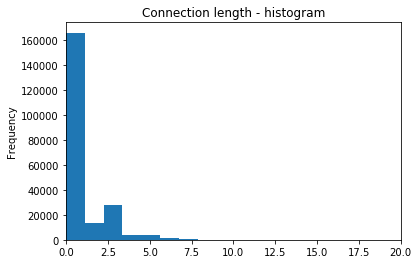

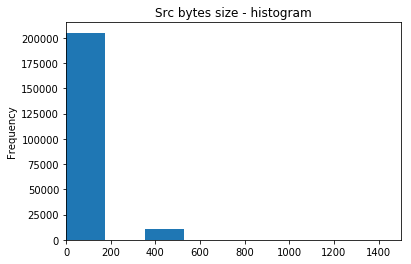

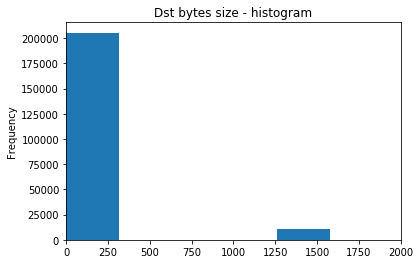

In [113]:
# hisotgrams

#print(max(data['conn len']))
data['conn len'].plot.hist(bins=500, xlim=[0,20], title="Connection length - histogram")
plt.show()

#print(max(data['src bytes']))
data['src bytes'].plot.hist(bins=500, xlim=[0,1500], title="Src bytes size - histogram")
plt.show()

#print(max(data['dst bytes']))
data['dst bytes'].plot.hist(bins=500, xlim=[0,2000], title="Dst bytes size - histogram")
plt.show()

Text(0.5,0.98,'')

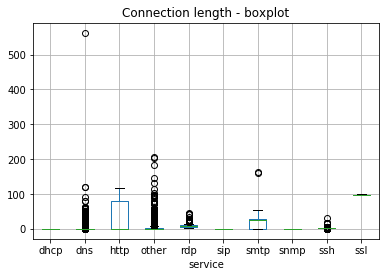

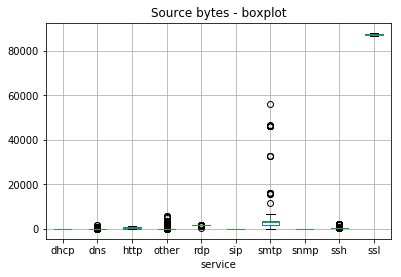

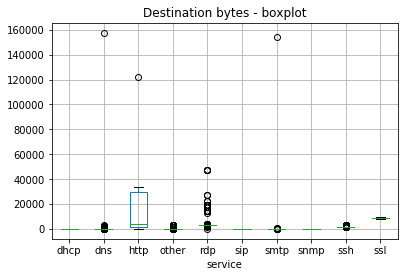

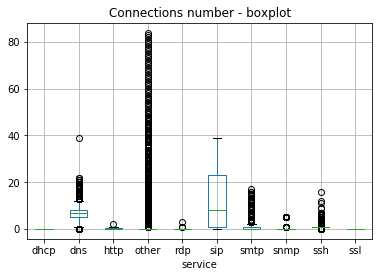

In [114]:
# boxplots
data.boxplot(column='conn len', by='service')
plt.title("Connection length - boxplot")
plt.suptitle("")

data.boxplot(column='src bytes', by='service')
plt.title("Source bytes - boxplot")
plt.suptitle("")

data.boxplot(column='dst bytes', by='service')
plt.title("Destination bytes - boxplot")
plt.suptitle("")

data.boxplot(column='conn numb', by='service')
plt.title("Connections number - boxplot")
plt.suptitle("")

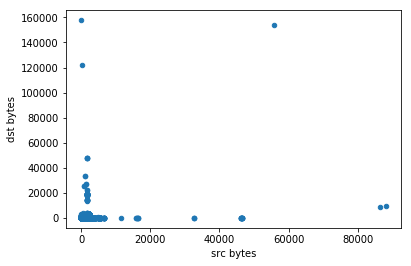

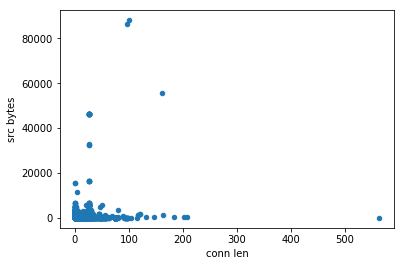

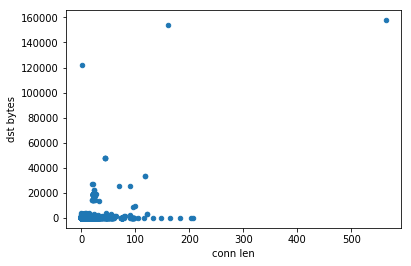

In [115]:
# scatter plots
data.plot.scatter(x='src bytes', y= 'dst bytes')
data.plot.scatter(x='conn len', y= 'src bytes')
data.plot.scatter(x='conn len', y= 'dst bytes')

In [116]:
### drop categorical columns ####

data = data.drop(["service", "Conn state", "proto"], axis=1)

# Training and testing set preparation

In [117]:
data.shape

(217628, 39)

In [118]:
### training dataset - make the dataset binary one ###
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-2, -1)
data.loc[:, "attack_flag"] = data.loc[:, "attack_flag"] * -1

In [119]:
# plotting method definition

def plot_stats(stat, name):
    fig, ax = plt.subplots(figsize=(7, 4))    
    ax.bar(range(len(stat)), list(stat.values()), align='center')
    plt.xticks(range(len(stat)), list(stat.keys()), rotation=35)
    for a,b in enumerate(stat.items()):
        ax.text(a, b[1] + max(stat.values())/60 , str(round(b[1],5)), horizontalalignment ='center', verticalalignment='baseline')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(name + " of tested algorithms")
    plt.show()

In [120]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from collections import Counter

import matplotlib.pyplot as plt

sampled_data = data.sample(n=10000, random_state=1)


X = sampled_data.loc[:, sampled_data.columns != 'attack_flag']
y = sampled_data.loc[:, sampled_data.columns == 'attack_flag'].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)


seed = 12

print(Counter(y_test))
print(Counter(y_train))

Counter({1: 2081, -1: 919})
Counter({1: 4840, -1: 2160})


# Decision Tree parameters selection

## Checking different parameters impact

In [121]:
classifiers = {
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "DecisionTree_ent_5":DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = 5),
               "DecisionTree_ent_7":DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = 7),
               "DecisionTree_5":DecisionTreeClassifier(random_state=0, max_depth = 5),
               "DecisionTree_7":DecisionTreeClassifier(random_state=0, max_depth = 7),
               "DecisionTree_ent":DecisionTreeClassifier(random_state=0, criterion = "entropy")

}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: DecisionTree Accuracy: 0.99300, F1-score: 0.99495, Precision: 0.99567, Recall: 0.99423, FPR: 0.00979
TN: 910; FP:   9; FN:   12; TP: 2069

Algorithm: DecisionTree_ent_5 Accuracy: 0.99500, F1-score: 0.99640, Precision: 0.99568, Recall: 0.99712, FPR: 0.00979
TN: 910; FP:   9; FN:    6; TP: 2075

Algorithm: DecisionTree_ent_7 Accuracy: 0.99433, F1-score: 0.99591, Precision: 0.99663, Recall: 0.99519, FPR: 0.00762
TN: 912; FP:   7; FN:   10; TP: 2071

Algorithm: DecisionTree_5 Accuracy: 0.99433, F1-score: 0.99592, Precision: 0.99568, Recall: 0.99616, FPR: 0.00979
TN: 910; FP:   9; FN:    8; TP: 2073

Algorithm: DecisionTree_7 Accuracy: 0.99433, F1-score: 0.99592, Precision: 0.99568, Recall: 0.99616, FPR: 0.00979
TN: 910; FP:   9; FN:    8; TP: 2073

Algorithm: DecisionTree_ent Accuracy: 0.99367, F1-score: 0.99543, Precision: 0.99567, Recall: 0.99519, FPR: 0.00979
TN: 910; FP:   9; FN:   10; TP: 2071



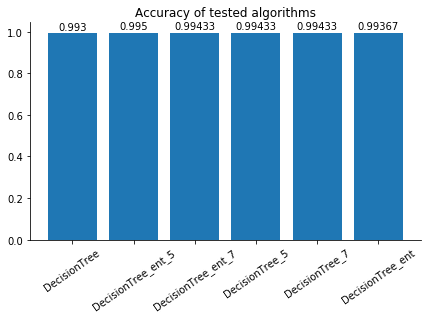

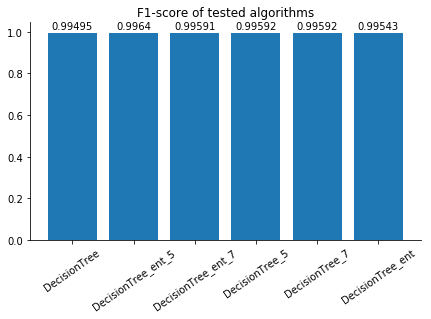

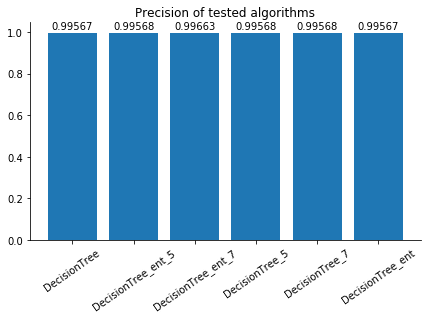

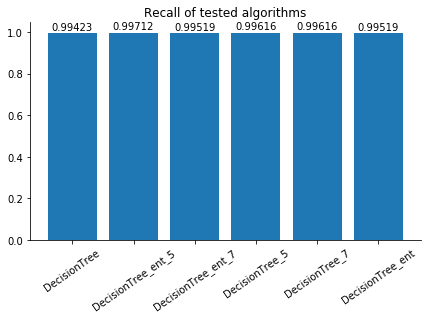

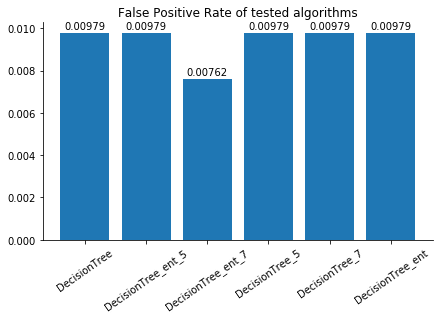

In [122]:
plot_stats(Acc, "Accuracy")
plot_stats(F1S, "F1-score")
plot_stats(Prec, "Precision")
plot_stats(Rec, "Recall")
plot_stats(FPR, "False Positive Rate")

## Checking tree depth impact

In [123]:
# plotting method definition

def plot_stats2(stat, name):
    fig, ax = plt.subplots(figsize=(8, 4))    
    ax.bar(range(len(stat)), list(stat.values()), align='center')
    plt.xticks(range(len(stat)), list(stat.keys()), rotation=55)
    for a,b in enumerate(stat.items()):
        ax.text(a, b[1] + max(stat.values())/60 , str(round(b[1],5)), horizontalalignment ='center', verticalalignment='baseline')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(name + " of tested algorithms")
    plt.show()

In [124]:
Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}


for depth in range(1,11):

    classifiers = {
                   "DecisionTree":DecisionTreeClassifier(random_state=0, max_depth = depth)
    }



    #for name, clf in classifiers.items():
    name = "DCT" + "_" + str(depth)
    model = classifiers["DecisionTree"].fit(X_train, y_train)

    y_pred = model.predict(X_test)

    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)

    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: DCT_1        Accuracy: 0.98633, F1-score: 0.99022, Precision: 0.98341, Recall: 0.99712, FPR: 0.03808
TN: 884; FP:  35; FN:    6; TP: 2075

Algorithm: DCT_2        Accuracy: 0.98733, F1-score: 0.99094, Precision: 0.98344, Recall: 0.99856, FPR: 0.03808
TN: 884; FP:  35; FN:    3; TP: 2078

Algorithm: DCT_3        Accuracy: 0.98700, F1-score: 0.99059, Precision: 0.99467, Recall: 0.98654, FPR: 0.01197
TN: 908; FP:  11; FN:   28; TP: 2053

Algorithm: DCT_4        Accuracy: 0.99400, F1-score: 0.99567, Precision: 0.99615, Recall: 0.99519, FPR: 0.00871
TN: 911; FP:   8; FN:   10; TP: 2071

Algorithm: DCT_5        Accuracy: 0.99433, F1-score: 0.99592, Precision: 0.99568, Recall: 0.99616, FPR: 0.00979
TN: 910; FP:   9; FN:    8; TP: 2073

Algorithm: DCT_6        Accuracy: 0.99433, F1-score: 0.99592, Precision: 0.99568, Recall: 0.99616, FPR: 0.00979
TN: 910; FP:   9; FN:    8; TP: 2073

Algorithm: DCT_7        Accuracy: 0.99433, F1-score: 0.99592, Precision: 0.99568, Recall: 0.99616, F

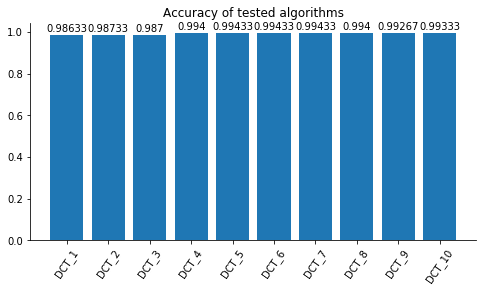

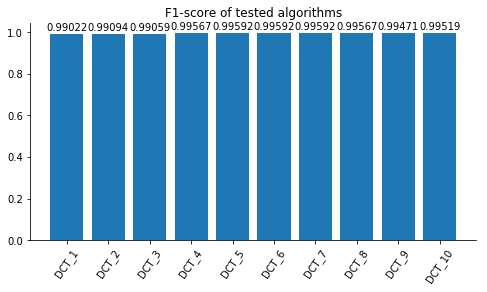

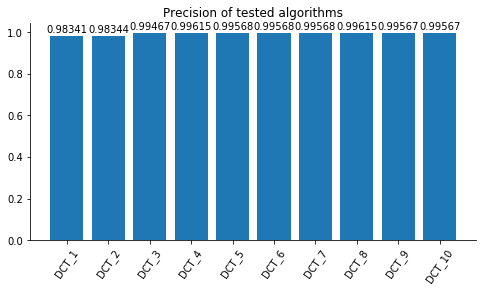

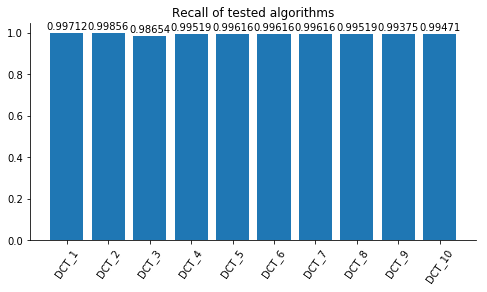

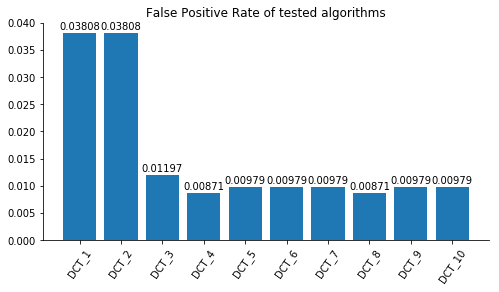

In [125]:
plot_stats2(Acc, "Accuracy")
plot_stats2(F1S, "F1-score")
plot_stats2(Prec, "Precision")
plot_stats2(Rec, "Recall")
plot_stats2(FPR, "False Positive Rate")

In [126]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from collections import Counter

import matplotlib.pyplot as plt


# zmiana n_estimators daje poprawe
# kfold tylko dla crossvalidation
# learning rate [1 - default] najlepsze wyniki

classifiers = {
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "DecisionTree_7":DecisionTreeClassifier(random_state=0, max_depth = 7),
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: DecisionTree Accuracy: 0.99300, F1-score: 0.99495, Precision: 0.99567, Recall: 0.99423, FPR: 0.00979
TN: 910; FP:   9; FN:   12; TP: 2069

Algorithm: DecisionTree_7 Accuracy: 0.99433, F1-score: 0.99592, Precision: 0.99568, Recall: 0.99616, FPR: 0.00979
TN: 910; FP:   9; FN:    8; TP: 2073



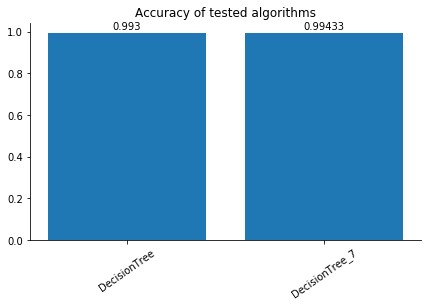

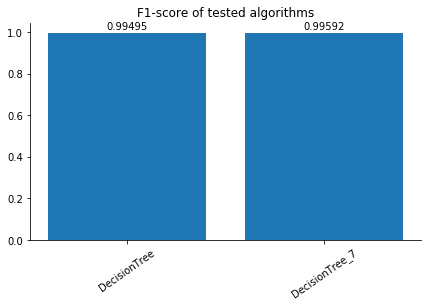

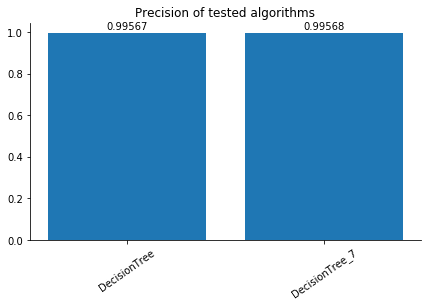

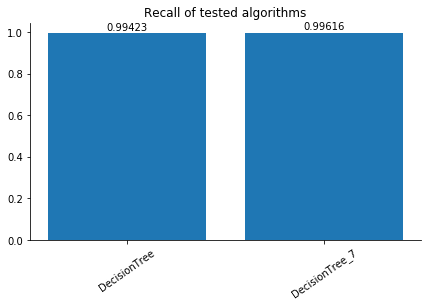

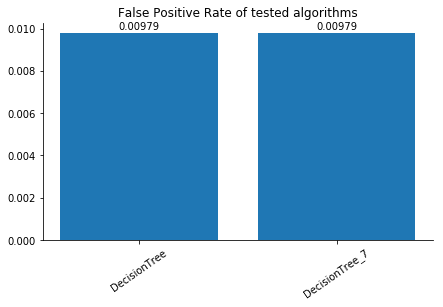

In [127]:
plot_stats(Acc, "Accuracy")
plot_stats(F1S, "F1-score")
plot_stats(Prec, "Precision")
plot_stats(Rec, "Recall")
plot_stats(FPR, "False Positive Rate")

## AdaBoost parameters selection

In [128]:
Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}
    
for num_trees in range(2,253,10):
    #kfold = KFold(n_splits = 2, random_state=seed)
    classifiers = {
                   "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 7, random_state=0), n_estimators=num_trees),
                   #"DecisionTree":DecisionTreeClassifier(random_state=0),
                   #"NaiveBayes":GaussianNB(),
                   #"RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
                   #"RandomForest":RandomForestClassifier(n_estimators=36, max_depth=2, random_state=0)
    }



    #for name, clf in classifiers.items():
    name = "Adaboost" + "_" + str(num_trees)
    model = classifiers["AdaBoost"].fit(X_train, y_train)

    y_pred = model.predict(X_test)

    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)

    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: Adaboost_2   Accuracy: 0.99333, F1-score: 0.99519, Precision: 0.99519, Recall: 0.99519, FPR: 0.01088
TN: 909; FP:  10; FN:   10; TP: 2071

Algorithm: Adaboost_12  Accuracy: 0.99500, F1-score: 0.99640, Precision: 0.99616, Recall: 0.99664, FPR: 0.00871
TN: 911; FP:   8; FN:    7; TP: 2074

Algorithm: Adaboost_22  Accuracy: 0.99567, F1-score: 0.99688, Precision: 0.99664, Recall: 0.99712, FPR: 0.00762
TN: 912; FP:   7; FN:    6; TP: 2075

Algorithm: Adaboost_32  Accuracy: 0.99433, F1-score: 0.99591, Precision: 0.99615, Recall: 0.99568, FPR: 0.00871
TN: 911; FP:   8; FN:    9; TP: 2072

Algorithm: Adaboost_42  Accuracy: 0.99400, F1-score: 0.99567, Precision: 0.99615, Recall: 0.99519, FPR: 0.00871
TN: 911; FP:   8; FN:   10; TP: 2071

Algorithm: Adaboost_52  Accuracy: 0.99533, F1-score: 0.99664, Precision: 0.99616, Recall: 0.99712, FPR: 0.00871
TN: 911; FP:   8; FN:    6; TP: 2075

Algorithm: Adaboost_62  Accuracy: 0.99467, F1-score: 0.99616, Precision: 0.99616, Recall: 0.99616, F

In [129]:
Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}
    
for num_trees in range(2,253,10):
    #kfold = KFold(n_splits = 2, random_state=seed)
    classifiers = {
                   "AdaBoost":AdaBoostClassifier(n_estimators=num_trees),
                   #"DecisionTree":DecisionTreeClassifier(random_state=0),
                   #"NaiveBayes":GaussianNB(),
                   #"RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
                   #"RandomForest":RandomForestClassifier(n_estimators=36, max_depth=2, random_state=0)
    }



    #for name, clf in classifiers.items():
    name = "Adaboost" + "_" + str(num_trees)
    model = classifiers["AdaBoost"].fit(X_train, y_train)

    y_pred = model.predict(X_test)

    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)

    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: Adaboost_2   Accuracy: 0.98633, F1-score: 0.99022, Precision: 0.98341, Recall: 0.99712, FPR: 0.03808
TN: 884; FP:  35; FN:    6; TP: 2075

Algorithm: Adaboost_12  Accuracy: 0.99000, F1-score: 0.99279, Precision: 0.99327, Recall: 0.99231, FPR: 0.01523
TN: 905; FP:  14; FN:   16; TP: 2065

Algorithm: Adaboost_22  Accuracy: 0.99067, F1-score: 0.99326, Precision: 0.99518, Recall: 0.99135, FPR: 0.01088
TN: 909; FP:  10; FN:   18; TP: 2063

Algorithm: Adaboost_32  Accuracy: 0.99400, F1-score: 0.99568, Precision: 0.99568, Recall: 0.99568, FPR: 0.00979
TN: 910; FP:   9; FN:    9; TP: 2072

Algorithm: Adaboost_42  Accuracy: 0.99400, F1-score: 0.99568, Precision: 0.99520, Recall: 0.99616, FPR: 0.01088
TN: 909; FP:  10; FN:    8; TP: 2073

Algorithm: Adaboost_52  Accuracy: 0.99467, F1-score: 0.99615, Precision: 0.99663, Recall: 0.99568, FPR: 0.00762
TN: 912; FP:   7; FN:    9; TP: 2072

Algorithm: Adaboost_62  Accuracy: 0.99467, F1-score: 0.99616, Precision: 0.99568, Recall: 0.99664, F

In [130]:
num_trees = 122

classifiers = {
               "AdaBoost_n_est_dct_rs":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 7), n_estimators=num_trees, random_state = seed),
               "AdaBoost_n_est_dct_0":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 7), n_estimators=num_trees, random_state = 0),
               "AdaBoost_n_est_dct_def":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 7), n_estimators=num_trees),
               "AdaBoost_n_est":AdaBoostClassifier(n_estimators=num_trees, random_state = seed),
               "AdaBoost_n_est_0":AdaBoostClassifier(n_estimators=num_trees, random_state = 0), 
               "AdaBoost_orig":AdaBoostClassifier()
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: AdaBoost_n_est_dct_rs Accuracy: 0.99400, F1-score: 0.99567, Precision: 0.99663, Recall: 0.99471, FPR: 0.00762
TN: 912; FP:   7; FN:   11; TP: 2070

Algorithm: AdaBoost_n_est_dct_0 Accuracy: 0.99533, F1-score: 0.99664, Precision: 0.99664, Recall: 0.99664, FPR: 0.00762
TN: 912; FP:   7; FN:    7; TP: 2074

Algorithm: AdaBoost_n_est_dct_def Accuracy: 0.99333, F1-score: 0.99519, Precision: 0.99615, Recall: 0.99423, FPR: 0.00871
TN: 911; FP:   8; FN:   12; TP: 2069

Algorithm: AdaBoost_n_est Accuracy: 0.99500, F1-score: 0.99640, Precision: 0.99616, Recall: 0.99664, FPR: 0.00871
TN: 911; FP:   8; FN:    7; TP: 2074

Algorithm: AdaBoost_n_est_0 Accuracy: 0.99500, F1-score: 0.99640, Precision: 0.99616, Recall: 0.99664, FPR: 0.00871
TN: 911; FP:   8; FN:    7; TP: 2074

Algorithm: AdaBoost_orig Accuracy: 0.99367, F1-score: 0.99543, Precision: 0.99567, Recall: 0.99519, FPR: 0.00979
TN: 910; FP:   9; FN:   10; TP: 2071



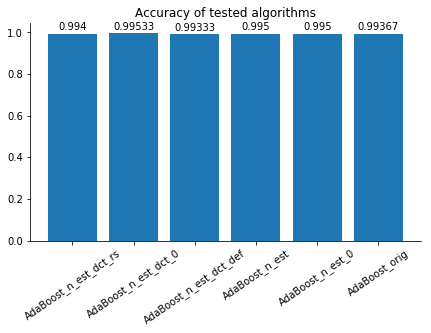

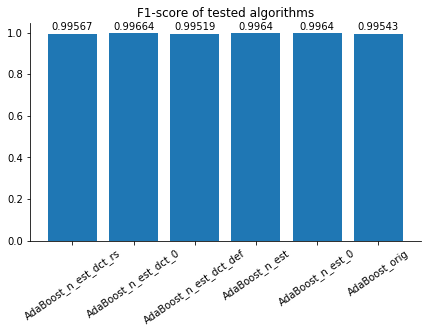

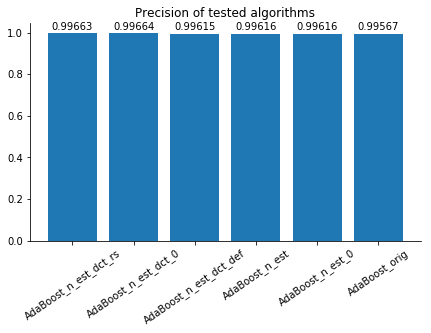

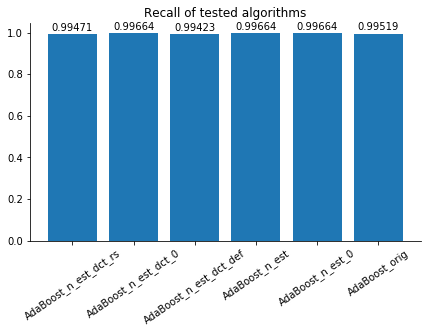

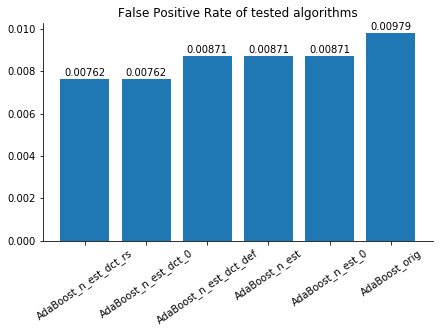

In [131]:
plot_stats(Acc, "Accuracy")
plot_stats(F1S, "F1-score")
plot_stats(Prec, "Precision")
plot_stats(Rec, "Recall")
plot_stats(FPR, "False Positive Rate")

## Random tree parameters selection

In [132]:
Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}


for depth in range(1,31):

    classifiers = {

                   "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random", max_depth = depth)
    }



    #for name, clf in classifiers.items():
    name = "RT" + "_" + str(depth)
    model = classifiers["RandomTree"].fit(X_train, y_train)

    y_pred = model.predict(X_test)

    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)

    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: RT_1         Accuracy: 0.98133, F1-score: 0.98660, Precision: 0.98283, Recall: 0.99039, FPR: 0.03917
TN: 883; FP:  36; FN:   20; TP: 2061

Algorithm: RT_2         Accuracy: 0.98467, F1-score: 0.98902, Precision: 0.98291, Recall: 0.99519, FPR: 0.03917
TN: 883; FP:  36; FN:   10; TP: 2071

Algorithm: RT_3         Accuracy: 0.98400, F1-score: 0.98841, Precision: 0.99321, Recall: 0.98366, FPR: 0.01523
TN: 905; FP:  14; FN:   34; TP: 2047

Algorithm: RT_4         Accuracy: 0.98400, F1-score: 0.98843, Precision: 0.99178, Recall: 0.98510, FPR: 0.01850
TN: 902; FP:  17; FN:   31; TP: 2050

Algorithm: RT_5         Accuracy: 0.98767, F1-score: 0.99109, Precision: 0.99324, Recall: 0.98895, FPR: 0.01523
TN: 905; FP:  14; FN:   23; TP: 2058

Algorithm: RT_6         Accuracy: 0.98467, F1-score: 0.98890, Precision: 0.99321, Recall: 0.98462, FPR: 0.01523
TN: 905; FP:  14; FN:   32; TP: 2049

Algorithm: RT_7         Accuracy: 0.99167, F1-score: 0.99399, Precision: 0.99471, Recall: 0.99327, F

In [133]:
classifiers = {
                "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
                "RandomTree_21":DecisionTreeClassifier(random_state=0, splitter = "random", max_depth = 21),
                
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: RandomTree   Accuracy: 0.99133, F1-score: 0.99375, Precision: 0.99375, Recall: 0.99375, FPR: 0.01415
TN: 906; FP:  13; FN:   13; TP: 2068

Algorithm: RandomTree_21 Accuracy: 0.99133, F1-score: 0.99375, Precision: 0.99375, Recall: 0.99375, FPR: 0.01415
TN: 906; FP:  13; FN:   13; TP: 2068



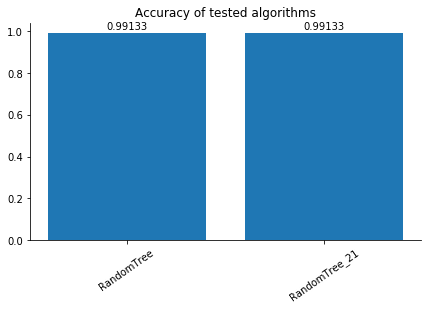

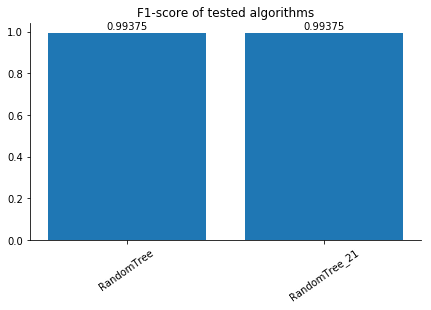

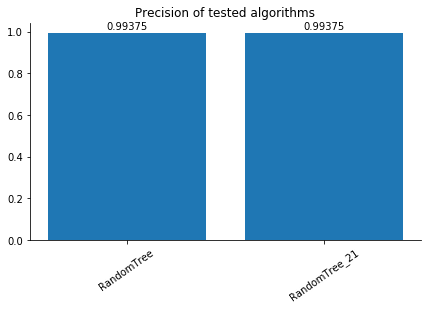

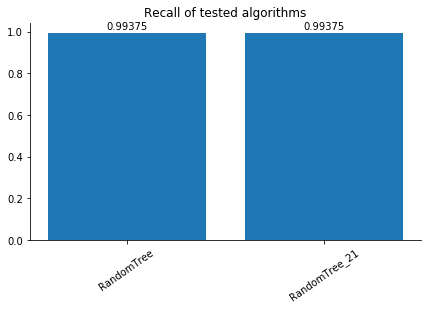

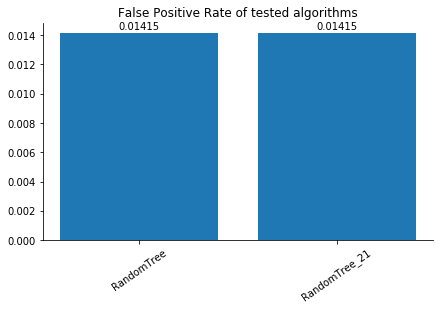

In [134]:
plot_stats(Acc, "Accuracy")
plot_stats(F1S, "F1-score")
plot_stats(Prec, "Precision")
plot_stats(Rec, "Recall")
plot_stats(FPR, "False Positive Rate")

## Random Forest parameters selection

In [135]:
Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}
    
for num_trees in range(2,253,10):
    #kfold = KFold(n_splits = 2, random_state=seed)
    classifiers = {
                   "RandomForest":RandomForestClassifier(n_estimators=num_trees, random_state=0),
                   #"DecisionTree":DecisionTreeClassifier(random_state=0),
                   #"NaiveBayes":GaussianNB(),
                   #"RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
                   #"RandomForest":RandomForestClassifier(n_estimators=36, max_depth=2, random_state=0)
    }



    #for name, clf in classifiers.items():
    name = "RF" + "_" + str(num_trees)
    model = classifiers["RandomForest"].fit(X_train, y_train)

    y_pred = model.predict(X_test)

    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)

    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: RF_2         Accuracy: 0.98767, F1-score: 0.99107, Precision: 0.99564, Recall: 0.98654, FPR: 0.00979
TN: 910; FP:   9; FN:   28; TP: 2053

Algorithm: RF_12        Accuracy: 0.99500, F1-score: 0.99640, Precision: 0.99568, Recall: 0.99712, FPR: 0.00979
TN: 910; FP:   9; FN:    6; TP: 2075

Algorithm: RF_22        Accuracy: 0.99567, F1-score: 0.99688, Precision: 0.99569, Recall: 0.99808, FPR: 0.00979
TN: 910; FP:   9; FN:    4; TP: 2077

Algorithm: RF_32        Accuracy: 0.99600, F1-score: 0.99712, Precision: 0.99569, Recall: 0.99856, FPR: 0.00979
TN: 910; FP:   9; FN:    3; TP: 2078

Algorithm: RF_42        Accuracy: 0.99567, F1-score: 0.99688, Precision: 0.99569, Recall: 0.99808, FPR: 0.00979
TN: 910; FP:   9; FN:    4; TP: 2077

Algorithm: RF_52        Accuracy: 0.99633, F1-score: 0.99736, Precision: 0.99616, Recall: 0.99856, FPR: 0.00871
TN: 911; FP:   8; FN:    3; TP: 2078

Algorithm: RF_62        Accuracy: 0.99633, F1-score: 0.99736, Precision: 0.99569, Recall: 0.99904, F

In [136]:
Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}
    
for depth in range(1,31):
    #kfold = KFold(n_splits = 2, random_state=seed)
    classifiers = {
                   "RandomForest":RandomForestClassifier(n_estimators=32, random_state=0, max_depth = depth),
                   #"DecisionTree":DecisionTreeClassifier(random_state=0),
                   #"NaiveBayes":GaussianNB(),
                   #"RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
                   #"RandomForest":RandomForestClassifier(n_estimators=36, max_depth=2, random_state=0)
    }



    #for name, clf in classifiers.items():
    name = "RF" + "_" + str(depth)
    model = classifiers["RandomForest"].fit(X_train, y_train)

    y_pred = model.predict(X_test)

    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)

    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: RF_1         Accuracy: 0.98300, F1-score: 0.98770, Precision: 0.99176, Recall: 0.98366, FPR: 0.01850
TN: 902; FP:  17; FN:   34; TP: 2047

Algorithm: RF_2         Accuracy: 0.98367, F1-score: 0.98821, Precision: 0.98940, Recall: 0.98703, FPR: 0.02394
TN: 897; FP:  22; FN:   27; TP: 2054

Algorithm: RF_3         Accuracy: 0.98900, F1-score: 0.99209, Precision: 0.98948, Recall: 0.99471, FPR: 0.02394
TN: 897; FP:  22; FN:   11; TP: 2070

Algorithm: RF_4         Accuracy: 0.98833, F1-score: 0.99158, Precision: 0.99277, Recall: 0.99039, FPR: 0.01632
TN: 904; FP:  15; FN:   20; TP: 2061

Algorithm: RF_5         Accuracy: 0.99233, F1-score: 0.99449, Precision: 0.99234, Recall: 0.99664, FPR: 0.01741
TN: 903; FP:  16; FN:    7; TP: 2074

Algorithm: RF_6         Accuracy: 0.99467, F1-score: 0.99617, Precision: 0.99331, Recall: 0.99904, FPR: 0.01523
TN: 905; FP:  14; FN:    2; TP: 2079

Algorithm: RF_7         Accuracy: 0.99433, F1-score: 0.99592, Precision: 0.99378, Recall: 0.99808, F

In [137]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla crossvalidation
# # learning rate [1 - default] najlepsze wyniki

num_trees = 182
seed = 12

classifiers = {
                "RandomForest":RandomForestClassifier(n_estimators=32, max_depth=22, random_state=0),
                "RandomForest_orig":RandomForestClassifier(),
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: RandomForest Accuracy: 0.99600, F1-score: 0.99712, Precision: 0.99569, Recall: 0.99856, FPR: 0.00979
TN: 910; FP:   9; FN:    3; TP: 2078

Algorithm: RandomForest_orig Accuracy: 0.99400, F1-score: 0.99568, Precision: 0.99520, Recall: 0.99616, FPR: 0.01088
TN: 909; FP:  10; FN:    8; TP: 2073



/home/matz/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


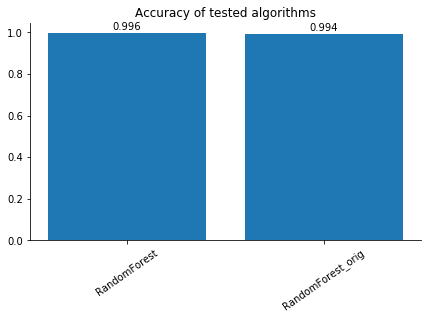

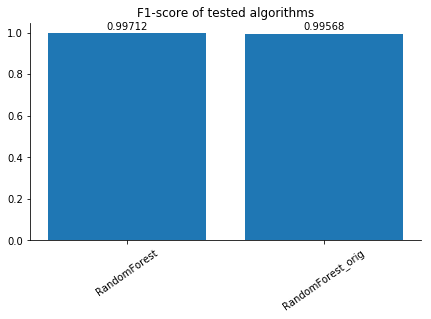

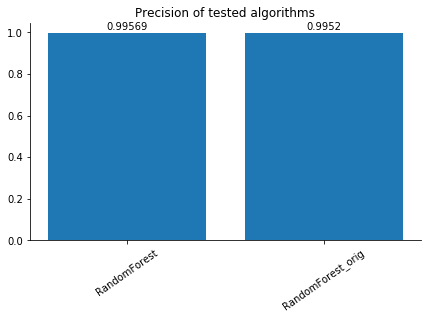

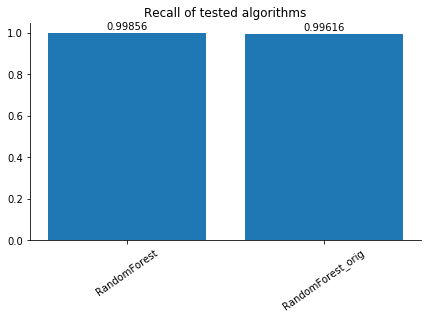

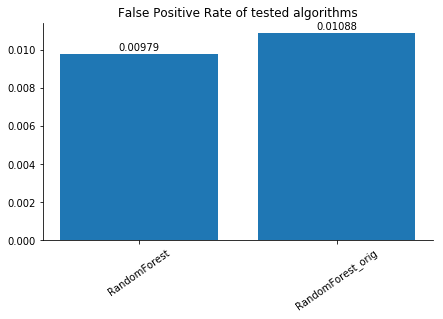

In [138]:
plot_stats(Acc, "Accuracy")
plot_stats(F1S, "F1-score")
plot_stats(Prec, "Precision")
plot_stats(Rec, "Recall")
plot_stats(FPR, "False Positive Rate")

# Algorithms' performance comparison

In [139]:
sampled_data = data.sample(n=10000, random_state=1)


X = sampled_data.loc[:, sampled_data.columns != 'attack_flag']
y = sampled_data.loc[:, sampled_data.columns == 'attack_flag'].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)


seed = 12

print(Counter(y_test))
print(Counter(y_train))

Counter({1: 2081, -1: 919})
Counter({1: 4840, -1: 2160})


In [140]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla crossvalidation
# # learning rate [1 - default] najlepsze wyniki

num_trees = 182
seed = 12

classifiers = {"AdaBoost":AdaBoostClassifier(n_estimators=182, random_state=seed),
               "AdaBoost_n_est_0":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 7), n_estimators=num_trees, random_state = 0),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "DecisionTree_7":DecisionTreeClassifier(random_state=0, max_depth = 7),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomTree_21":DecisionTreeClassifier(random_state=0, splitter = "random", max_depth = 21),
               "RandomForest":RandomForestClassifier(),
               "RandomForest_np":RandomForestClassifier(n_estimators=32, max_depth=22, random_state=0)
              }

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: AdaBoost     Accuracy: 0.99567, F1-score: 0.99688, Precision: 0.99616, Recall: 0.99760, FPR: 0.00871
TN: 911; FP:   8; FN:    5; TP: 2076

Algorithm: AdaBoost_n_est_0 Accuracy: 0.99533, F1-score: 0.99664, Precision: 0.99664, Recall: 0.99664, FPR: 0.00762
TN: 912; FP:   7; FN:    7; TP: 2074

Algorithm: DecisionTree Accuracy: 0.99300, F1-score: 0.99495, Precision: 0.99567, Recall: 0.99423, FPR: 0.00979
TN: 910; FP:   9; FN:   12; TP: 2069

Algorithm: DecisionTree_7 Accuracy: 0.99433, F1-score: 0.99592, Precision: 0.99568, Recall: 0.99616, FPR: 0.00979
TN: 910; FP:   9; FN:    8; TP: 2073

Algorithm: NaiveBayes   Accuracy: 0.98267, F1-score: 0.98755, Precision: 0.98425, Recall: 0.99087, FPR: 0.03591
TN: 886; FP:  33; FN:   19; TP: 2062

Algorithm: RandomTree   Accuracy: 0.99133, F1-score: 0.99375, Precision: 0.99375, Recall: 0.99375, FPR: 0.01415
TN: 906; FP:  13; FN:   13; TP: 2068

Algorithm: RandomTree_21 Accuracy: 0.99133, F1-score: 0.99375, Precision: 0.99375, Recall: 0.9

/home/matz/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


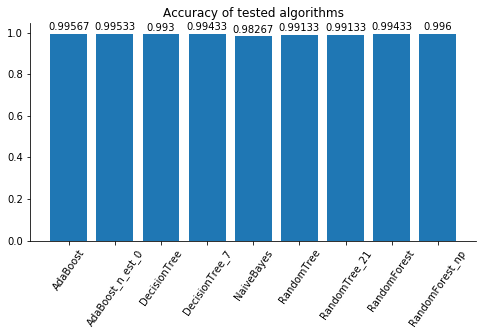

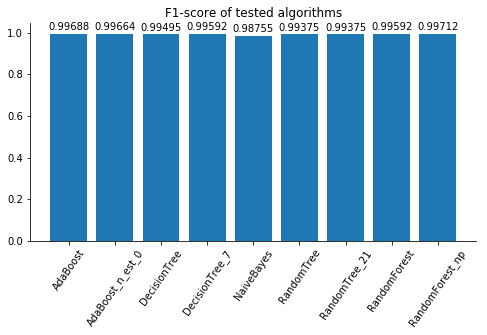

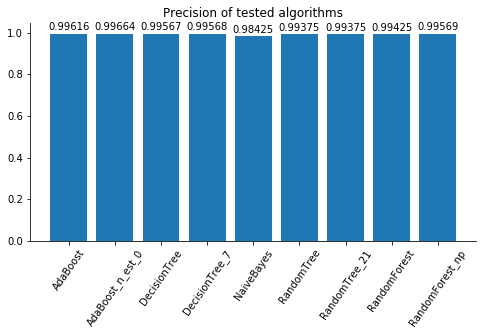

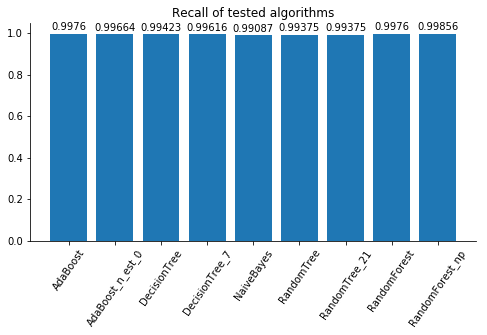

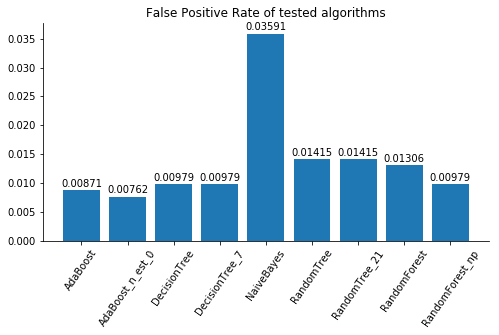

In [141]:
plot_stats2(Acc, "Accuracy")
plot_stats2(F1S, "F1-score")
plot_stats2(Prec, "Precision")
plot_stats2(Rec, "Recall")
plot_stats2(FPR, "False Positive Rate")

In [142]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla crossvalidation
# # learning rate [1 - default] najlepsze wyniki

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

num_trees = 182
seed = 12

classifiers = {"AdaBoost":AdaBoostClassifier(n_estimators=182, random_state=seed),
               "AdaBoost_n_est_0":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 7), n_estimators=num_trees, random_state = 0),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "DecisionTree_7":DecisionTreeClassifier(random_state=0, max_depth = 7),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomTree_21":DecisionTreeClassifier(random_state=0, splitter = "random", max_depth = 21),
               "RandomForest":RandomForestClassifier(),
               "RandomForest_np":RandomForestClassifier(n_estimators=32, max_depth=22, random_state=0)
              }

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    name = name + "_scaled"
    clf_scaled = make_pipeline(StandardScaler(), clf)
    model = clf_scaled.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: 

Algorithm: AdaBoost_scaled Accuracy: 0.99533, F1-score: 0.99664, Precision: 0.99616, Recall: 0.99712, FPR: 0.00871
TN: 911; FP:   8; FN:    6; TP: 2075



/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarnin

Algorithm: AdaBoost_n_est_0_scaled Accuracy: 0.99533, F1-score: 0.99664, Precision: 0.99664, Recall: 0.99664, FPR: 0.00762
TN: 912; FP:   7; FN:    7; TP: 2074

Algorithm: DecisionTree_scaled Accuracy: 0.99300, F1-score: 0.99495, Precision: 0.99567, Recall: 0.99423, FPR: 0.00979
TN: 910; FP:   9; FN:   12; TP: 2069

Algorithm: DecisionTree_7_scaled Accuracy: 0.99433, F1-score: 0.99592, Precision: 0.99568, Recall: 0.99616, FPR: 0.00979
TN: 910; FP:   9; FN:    8; TP: 2073

Algorithm: NaiveBayes_scaled Accuracy: 0.97867, F1-score: 0.98448, Precision: 0.99364, Recall: 0.97549, FPR: 0.01415
TN: 906; FP:  13; FN:   51; TP: 2030

Algorithm: RandomTree_scaled Accuracy: 0.99133, F1-score: 0.99375, Precision: 0.99375, Recall: 0.99375, FPR: 0.01415
TN: 906; FP:  13; FN:   13; TP: 2068

Algorithm: RandomTree_21_scaled Accuracy: 0.99133, F1-score: 0.99375, Precision: 0.99375, Recall: 0.99375, FPR: 0.01415
TN: 906; FP:  13; FN:   13; TP: 2068

Algorithm: RandomForest_scaled Accuracy: 0.99467, F1-sc

/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


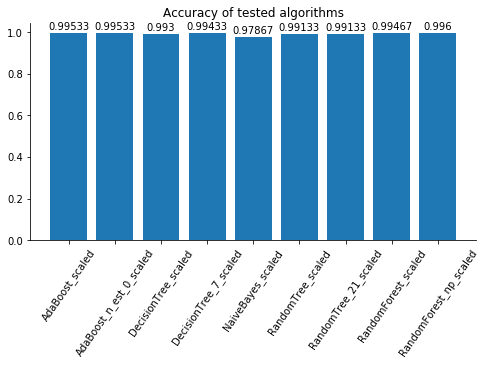

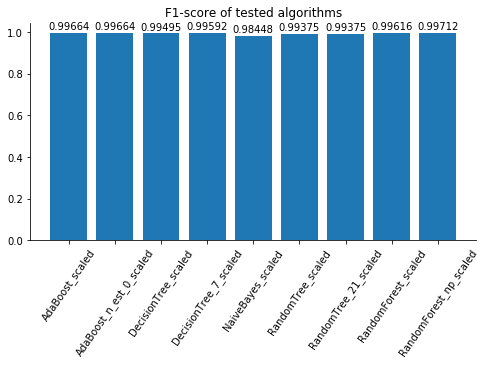

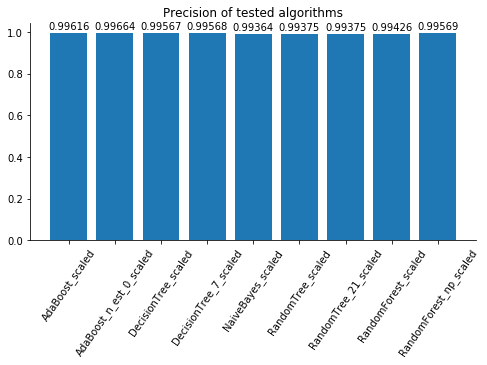

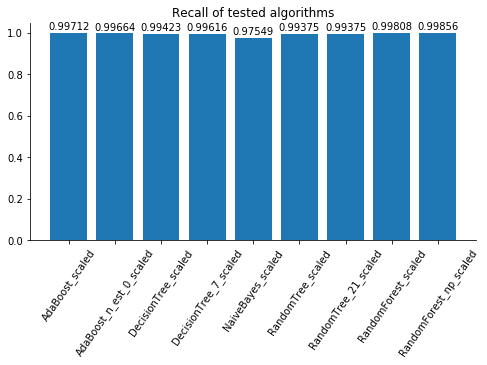

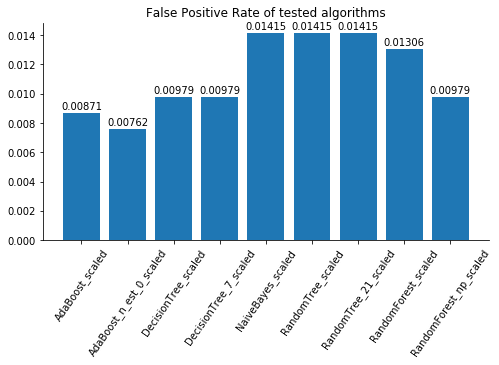

In [143]:
plot_stats2(Acc, "Accuracy")
plot_stats2(F1S, "F1-score")
plot_stats2(Prec, "Precision")
plot_stats2(Rec, "Recall")
plot_stats2(FPR, "False Positive Rate")